Purpose: 

The purpose of this notebook is to examine the spatially disaggregated model outputs vis-a-vis the mobility patterns seen across Zimbabwe from the original OD matrix. 

We want to see to what extent the infection and deaths that the model predicted according to a beta of (.3?) reflected where in the country saw the highest share of inbound and outbound movement 

Note: it is i5 data that is used in the model


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import os
import pylab as plt
import geopandas as gpd
import adjustText as aT
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from glob import glob

## 1. Display the spatial disaggregation on mobility data 

In [40]:
# set paths 
from os.path import isfile, join
path = '/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/preprocessed/mobility/New Files/'


In [41]:

mobile_i5 = pd.read_csv(path+'analysis/most_mobile_dists.csv', sep= ',')
mobile_i5.head()

,dist_id,dist_name,home_region,perc_pop_left_dist
0,1,Bulawayo,d_1,0.139655
1,2,Harare,d_2,0.264199
2,3,Buhera,d_3,0.340982
3,4,Chimanimani,d_4,0.310155
4,5,Chipinge,d_5,0.047730


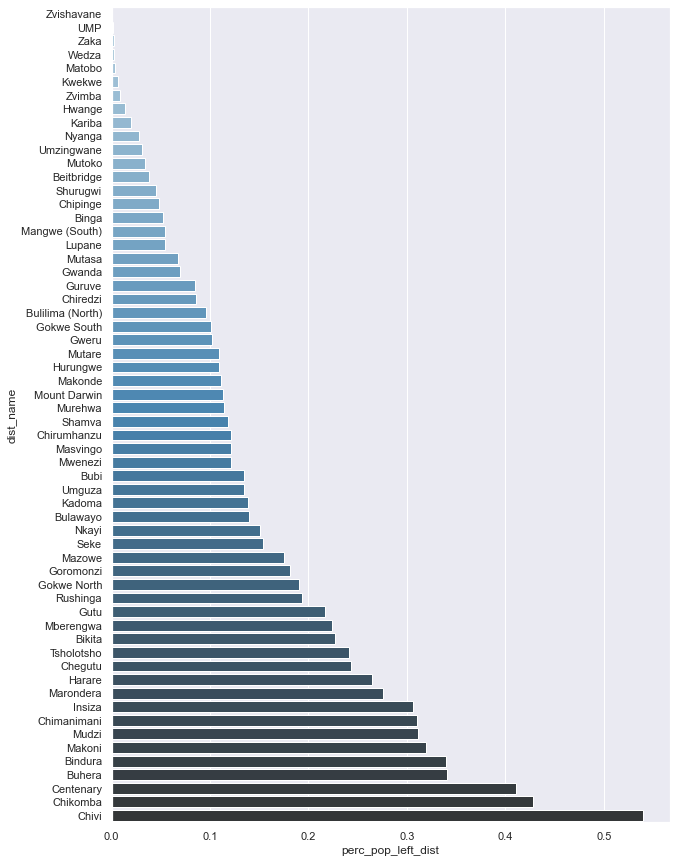

In [42]:
#plot in order seaborn
fig, ax = plt.subplots (figsize = (10, 15))
ax = sns.barplot(x="perc_pop_left_dist", y="dist_name", 
                 palette="Blues_d", data=mobile_i5, order=mobile_i5.sort_values('perc_pop_left_dist').dist_name)




# # The horizontal plot is made using the hline function
# #plt.hlines(y=ordered_df['district_name_shpfile'], xmin=ordered_df['true_cases_by_dist'], xmax=ordered_df['sim_tot_cases_dist_med'], color='grey', alpha=0.4)
# plt.scatter(ordered_df['true_cases_by_dist'], my_range, color='red', alpha=1, label='total observed cases by district')
# plt.scatter(ordered_df['sim_tot_cases_dist'], my_range, color='green', alpha=0.4 , label='total sim cases by district')
# plt.legend(loc='lower right')
 
# # Add title and axis names
# plt.yticks(my_range, ordered_df['district_name_shpfile'])
# plt.title("Comparison of Sim and Observed data on Total Cases by district", loc='left', size = 16)
# plt.xlabel('Total cases by District', size = 16)
# plt.ylabel('District', size = 16)

# #limit range on axis
# plt.xlim([0, 12500])

# # Show the graph
# plt.savefig(path+'plots/district/lolipop_plots/tot_cases_dists_sim_vs_true_exclHarare.png')



In [61]:
dist_names = pd.read_csv(path+'../../../raw/shapefiles/new_districts/ZWE_adm2.csv', sep= ',')
dist_names.head()
# ID_2 is the 60 districts number field, NAME_2 is the merge field
dist_names.rename(columns={'ID_2': 'district_id',
                   'NAME_2': 'dist_name'},
          inplace=True, errors='raise')
dist_names = dist_names.drop_duplicates(subset=['district_id'])
dist_names.head()

,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,district_id,dist_name,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,COMB
0,1,256,ZWE,Zimbabwe,1,Bulawayo,1,Bulawayo,District,District,NaN,NaN,1-Bulawayo
1,2,256,ZWE,Zimbabwe,2,Harare,2,Harare,District,District,NaN,Salisbury|Harare Urban,2-Harare
2,3,256,ZWE,Zimbabwe,3,Manicaland,3,Buhera,District,District,NaN,NaN,3-Buhera
3,4,256,ZWE,Zimbabwe,3,Manicaland,4,Chimanimani,District,District,NaN,NaN,4-Chimanimani
4,5,256,ZWE,Zimbabwe,3,Manicaland,5,Chipinge,District,District,NaN,NaN,5-Chipinge


In [62]:
# take a loook at the case data from the 25 perc run from ICCS
path2 = '/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/'
cum_cases_25p = pd.read_excel(path2+'map_input/cum_cases_num_25p_multidist.xlsx', engine='openpyxl')

#join in the dist names 
cum_cases_25 = pd.merge(cum_cases_25p, dist_names, on='district_id', how='outer')


cum_cases_25.head()

,district_id,1 cum_cases_sympt25,5 cum_cases_sympt25,15 cum_cases_sympt25,20 cum_cases_sympt25,25 cum_cases_sympt25,30 cum_cases_sympt25,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,dist_name,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,COMB
0,1,10,16,140,366,912,2236,1,256,ZWE,Zimbabwe,1,Bulawayo,Bulawayo,District,District,NaN,NaN,1-Bulawayo
1,2,86,148,1098,2636,6354,15368,2,256,ZWE,Zimbabwe,2,Harare,Harare,District,District,NaN,Salisbury|Harare Urban,2-Harare
2,3,0,0,4,26,98,356,3,256,ZWE,Zimbabwe,3,Manicaland,Buhera,District,District,NaN,NaN,3-Buhera
3,4,0,0,0,2,16,84,4,256,ZWE,Zimbabwe,3,Manicaland,Chimanimani,District,District,NaN,NaN,4-Chimanimani
4,5,0,0,0,4,18,88,5,256,ZWE,Zimbabwe,3,Manicaland,Chipinge,District,District,NaN,NaN,5-Chipinge


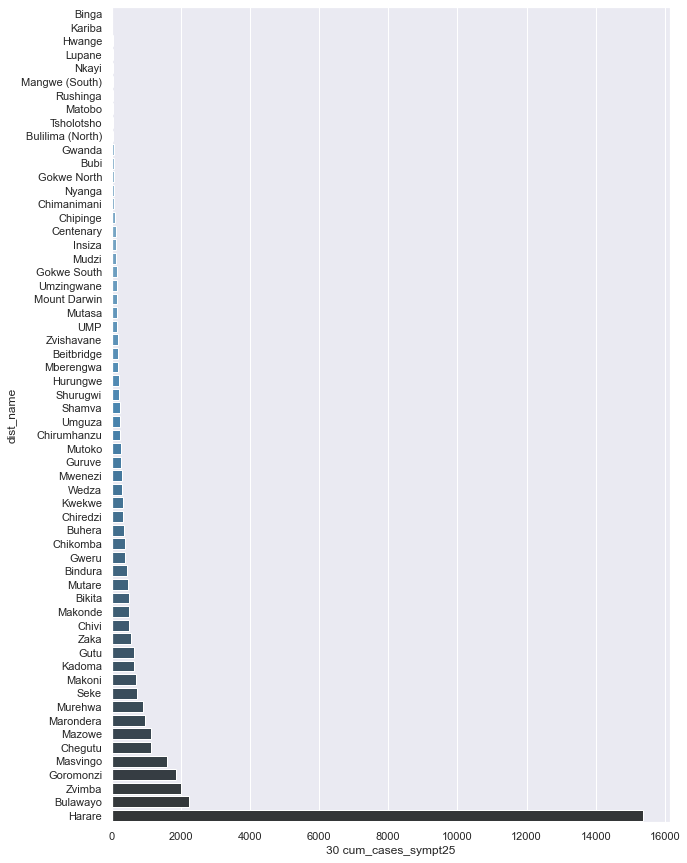

In [63]:
#plot in order seaborn
fig, ax = plt.subplots (figsize = (10, 15))
ax = sns.barplot(x="30 cum_cases_sympt25", y="dist_name", 
                 palette="Blues_d", data=cum_cases_25, order=cum_cases_25.sort_values('30 cum_cases_sympt25').dist_name)




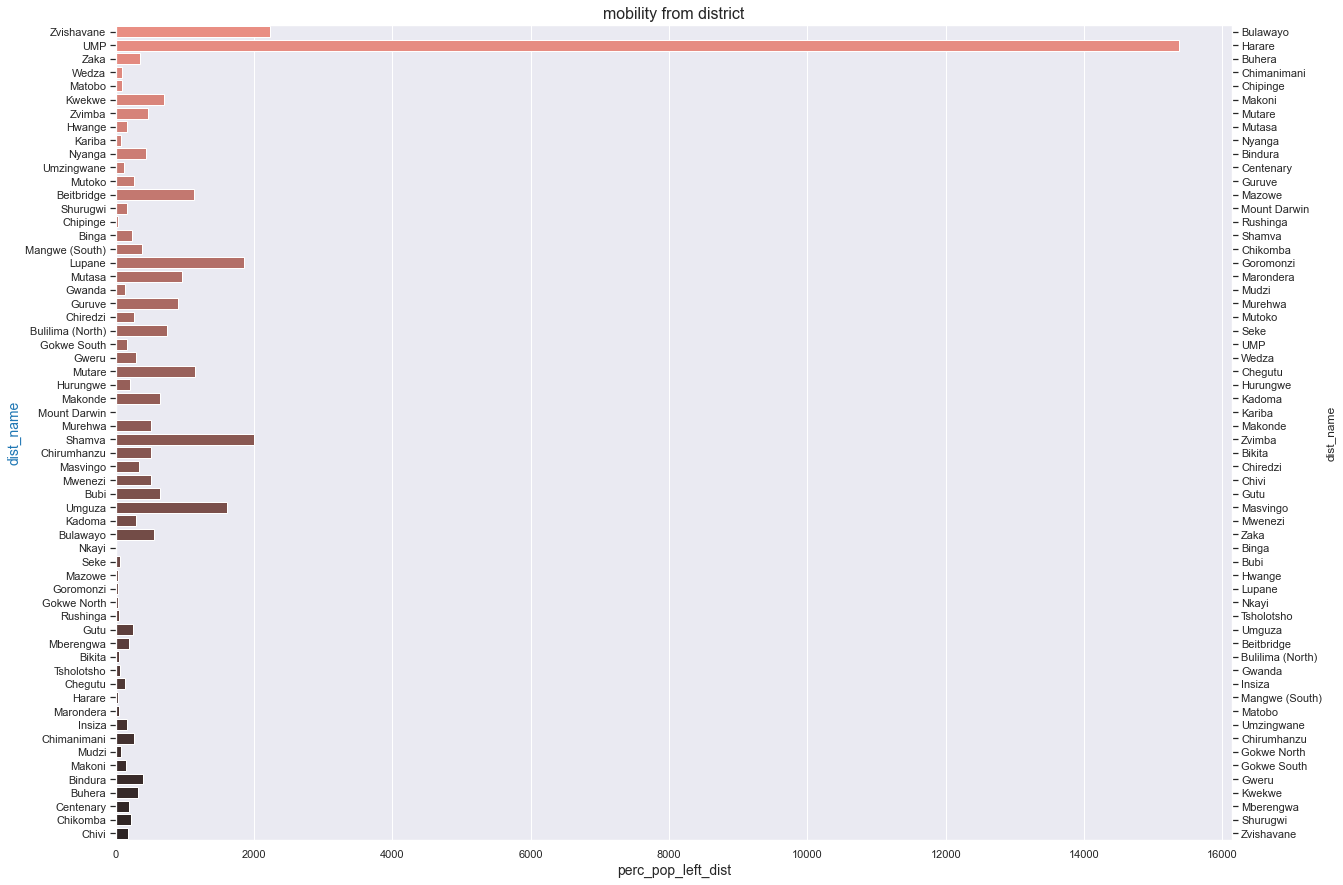

In [75]:
# do secondary axis plot

fig, ax1 = plt.subplots(figsize=(20,15))
color = 'tab:blue'
#mobility
ax1.set_title('mobility from district', fontsize=16)
ax1.set_xlabel('district name', fontsize= 14)
ax1.set_ylabel('% of pop to move', fontsize=14, color= color)
ax1= sns.barplot(x='perc_pop_left_dist', y='dist_name', data=mobile_i5, palette="Blues_d",order=mobile_i5.sort_values('perc_pop_left_dist').dist_name)
ax1.tick_params(axis='y')
#ax1.set_xlim([0,400])

#specify we want to share the same x axis
ax2 = ax1.twinx()

#bar plot creation for sim data
ax2.set_xlabel('sim daily cases 25% sample', fontsize=14, color=color)
ax2 = sns.barplot(x='30 cum_cases_sympt25', y='dist_name', 
                 palette="dark:salmon_r", data=cum_cases_25)
ax2.tick_params(axis='x', color=color)
#ax2.set_xlim([0,400])
#show plot
#fig.savefig('../data/output/plots/mobility_plus_cases.png')

In [ ]:
#visualize the plot
x_lin_reg = range(0,140)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x,y, color='blue')
plt.plot(x_lin_reg, y_lin_reg, c='r')
#plt.title("Comparison of Sim and Observed data on First Cases by district", loc='center', size=16)
plt.xlabel('First case day in observed data', size = 16)
plt.ylabel('First case day in sim data', size = 16)

#limit range on axis
plt.xlim([0, 140])
plt.ylim([0, 140])

# add labels to values on district id
for line in range(0,comparison.shape[0]):
    ax.text(comparison.trueDay[line] +0.01, comparison.simDay[line],
           comparison.districtId[line], horizontalalignment='left',
           size='medium', color='black', weight ='light')
    

# change dimensions of fig size
plt.gcf().set_size_inches(10, 10)
    
plt.savefig(path+'plots/sim_vs_true_firstcases_rsq_'+output_filename+'.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


In [3]:
most_mobile_i5 = pd.read_excel(path+'Most mobile districts i5.xlsx', engine='openpyxl')

most_mobile_i5.head()

,inbound_district,order,outbound_district
0,d_2,0,d_2
1,d_31,1,d_31
2,d_18,2,d_18
3,d_23,3,d_23
4,d_26,4,d_26


In [ ]:
# Reorder it following the values of the first value:
ordered_df = dist_true_plus_sim.sort_values(by='true_cases_by_dist')
#ordered_df = dist_true_plus_sim[['districtId', 'true_cases_by_dist', 'sim_tot_cases_dist_med']]

my_range=range(1,len(dist_true_plus_sim.index)+1)
fig, ax = plt.subplots (figsize = (10, 15))

# The horizontal plot is made using the hline function
#plt.hlines(y=ordered_df['district_name_shpfile'], xmin=ordered_df['true_cases_by_dist'], xmax=ordered_df['sim_tot_cases_dist_med'], color='grey', alpha=0.4)
plt.scatter(ordered_df['true_cases_by_dist'], my_range, color='red', alpha=1, label='total observed cases by district')
plt.scatter(ordered_df['sim_tot_cases_dist'], my_range, color='green', alpha=0.4 , label='total sim cases by district')
plt.legend(loc='lower right')
 
# Add title and axis names
plt.yticks(my_range, ordered_df['district_name_shpfile'])
plt.title("Comparison of Sim and Observed data on Total Cases by district", loc='left', size = 16)
plt.xlabel('Total cases by District', size = 16)
plt.ylabel('District', size = 16)

#limit range on axis
plt.xlim([0, 12500])

# Show the graph
plt.savefig(path+'plots/district/lolipop_plots/tot_cases_dists_sim_vs_true_exclHarare.png')


In [27]:
OD_matrix_nld = pd.read_csv(path+'daily_region_transition_probability-new-district-pre-lockdown_i5.csv', sep=',')


#split home_region and create a compatible numeric variable 

OD_matrix_nld[['d','dist_id']] = OD_matrix_nld.home_region.str.split("_", expand=True)

del OD_matrix_nld['d']

OD_matrix_nld['dist_id'] = pd.to_numeric(OD_matrix_nld['dist_id'])

#then want to merge in the name to the dist_id column
OD_matrix_nld = pd.merge(OD_matrix_nld, dist_names, on='dist_id', how='outer')

# reorder columns
cols = OD_matrix_nld.columns.tolist()
print(cols) ## way to get the col list to rearrange
#OD_matrix_nld = OD_matrix_nld[['dist_id', 'home_region', 'NAME_1', 'dist_name', 'weekday',  'd_1', 'd_2', 'd_3', 'd_4', 
#                                'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 
#                                'd_16','d_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 
#                                'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 
#                                'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 
#                                'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60']]
for col in OD_matrix_nld.columns:
     print(col)
OD_matrix_nld.head()

['weekday', 'home_region', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'dist_id', 'OBJECTID', 'ID_0', 'ISO', 'NAME_0', 'NAME_1', 'ID_2', 'dist_name', 'TYPE_2', 'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2', 'COMB']
weekday
home_region
d_1
d_2
d_3
d_4
d_5
d_6
d_7
d_8
d_9
d_10
d_11
d_12
d_13
d_14
d_15
d_16
d_17
d_18
d_19
d_20
d_21
d_22
d_23
d_24
d_25
d_26
d_27
d_28
d_29
d_30
d_31
d_32
d_33
d_34
d_35
d_36
d_37
d_38
d_39
d_40
d_41
d_42
d_43
d_44
d_45
d_46
d_47
d_48
d_49
d_50
d_51
d_52
d_53
d_54
d_55
d_56
d_57
d_58
d_59
d_60
dist_id
OBJECTID
ID_0
ISO
NAME_0
NAME_1
ID_2
dist_name


,weekday,home_region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,ISO,NAME_0,NAME_1,ID_2,dist_name,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,COMB
0,0,d_1,85.807602,86.224602,86.242401,86.245697,86.246696,86.249199,86.272102,86.272102,...,ZWE,Zimbabwe,Bulawayo,1.0,Bulawayo,District,District,NaN,NaN,1-Bulawayo
1,1,d_1,86.027802,86.408302,86.421700,86.423798,86.423798,86.423798,86.446999,86.446999,...,ZWE,Zimbabwe,Bulawayo,1.0,Bulawayo,District,District,NaN,NaN,1-Bulawayo
2,2,d_1,86.429497,86.742699,86.759201,86.761101,86.761101,86.761101,86.787300,86.787300,...,ZWE,Zimbabwe,Bulawayo,1.0,Bulawayo,District,District,NaN,NaN,1-Bulawayo
3,3,d_1,86.469902,86.783997,86.794296,86.794296,86.794296,86.794296,86.815598,86.815598,...,ZWE,Zimbabwe,Bulawayo,1.0,Bulawayo,District,District,NaN,NaN,1-Bulawayo
4,4,d_1,86.568901,86.892998,86.907600,86.909599,86.909599,86.909599,86.930702,86.931702,...,ZWE,Zimbabwe,Bulawayo,1.0,Bulawayo,District,District,NaN,NaN,1-Bulawayo


In [24]:
# create summary dataset of average mobility by district across all weekdays, so it is collapse by dist_id and weekday taking the average value across weekdays for each dist_id
#df.groupby(['groupvar1', 'groupvar2'])[['var1', 'var2']].mean()

#collapsed = census_5p.groupby(['district_id']).agg({'age':np.mean, 'school_goers':np.sum})

ODM_nld_collapsed = OD_matrix_nld.groupby(['dist_id', 'dist_name']).agg({'d_2':['mean']})
ODM_nld_collapsed.head()

d_2
                          mean
dist_id dist_name             
1       Bulawayo     86.391885
2       Harare       73.580071
3       Buhera        1.148271
        Chimanimani   1.148271
        Chipinge      1.148271

In [20]:
OD_matrix_ld = pd.read_csv(path+'daily_region_transition_probability-new-district-post-lockdown_i5.csv', sep=',')
OD_matrix_ld.head()

,weekday,home_region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
0,0,d_1,92.014503,92.070297,92.070297,92.070297,92.070297,92.070297,92.070297,92.070297,...,99.229797,99.795502,99.803802,99.803802,99.803802,99.917503,99.964104,99.974503,99.976196,100
1,1,d_1,91.739899,91.789803,91.789803,91.789803,91.789803,91.789803,91.789803,91.789803,...,99.056198,99.781700,99.789101,99.789101,99.789101,99.906898,99.955803,99.969200,99.974403,100
2,2,d_1,91.582298,91.625099,91.626801,91.626801,91.626801,91.626801,91.626801,91.626801,...,99.021500,99.762001,99.774300,99.774300,99.776100,99.900497,99.947197,99.961304,99.966003,100
3,3,d_1,91.617798,91.667702,91.670502,91.670502,91.670502,91.670502,91.670502,91.670502,...,99.044998,99.748497,99.759300,99.759300,99.760696,99.893799,99.947601,99.962700,99.969002,100
4,4,d_1,91.706703,91.761299,91.762802,91.762802,91.762802,91.762802,91.762802,91.762802,...,99.064796,99.743797,99.755699,99.755699,99.755699,99.893997,99.950401,99.963997,99.969498,100
